In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [7]:
# 读取数据
path='datas/iris.data'
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv(path, header=None, names=names)
print(df['class'].value_counts())
df.head()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# 构造特征矩阵

def parse_record(record):
    result=[]
    r=zip(names,record)
    for name,v in r:
        if name=='class':
            if v=='Iris-setosa':
                result.append(1)
            elif v=='Iris-versicolor':
                result.append(2)
            elif v=='Iris-virginica':
                result.append(3)
            else:
                result.append(np.nan)
        else:
            result.append(float(v))
    return result

In [41]:
datas=df.apply(lambda r: parse_record(r),axis=1)
datas=datas.dropna(how='any')
datas.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [37]:
# 获取X,Y
x=datas[names[0:-1]]
y=datas[names[-1]]

# 划分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
print("原始数据条数:%d "% x.shape[0])
print("特征个数:%d "% x.shape[1])
print("训练数据条数:%d "% x_train.shape[0])
print("测试数据条数:%d "% x_test.shape[0])

原始数据条数:150 
特征个数:4 
训练数据条数:90 
测试数据条数:60 


In [55]:
arr=np.array([[1,2,3],[4,5,7]])
arr.ravel()

array([1, 2, 3, 4, 5, 7])

In [57]:
# KNN模型构建
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

# 将正确的数据转换为矩阵形式
y_test_hot=label_binarize(y_test,classes=(1,2,3))
# 得到预测值属于某个类别的概率值
knn_y_score=knn.predict_proba(x_test)

# 计算roc值
knn_fpr,knn_tpr,knn_threasholds=metrics.roc_curve(y_test_hot.ravel(),knn_y_score.ravel())

knn_auc=metrics.auc(knn_fpr,knn_tpr)
print("KNN算法R^2值:",knn.score(x_train,y_train))
print("KNN算法AUC值:",knn_auc)

# 模型预测
knn_y_predict=knn.predict(x_test)

KNN算法R^2值: 0.9888888888888889
KNN算法AUC值: 0.9700000000000001


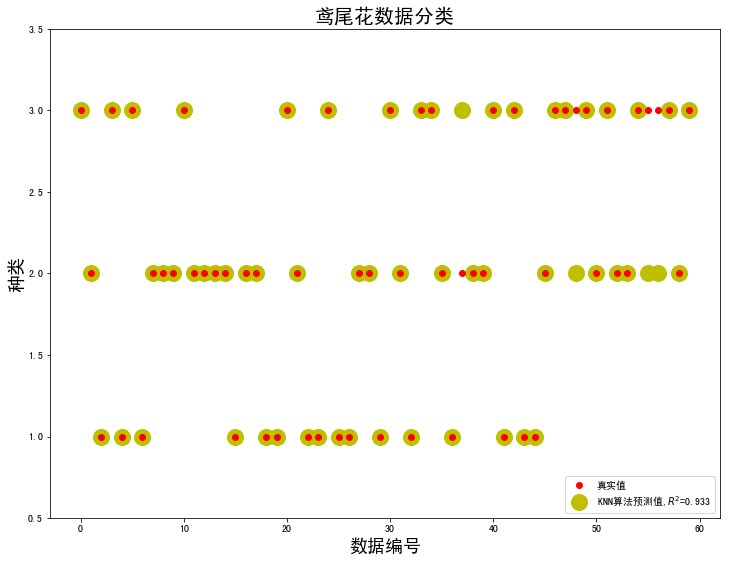

In [61]:
## 画图2：预测结果画图
x_test_len = range(len(x_test))
plt.figure(figsize=(12, 9), facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len, y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_test_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % knn.score(x_test, y_test))
plt.legend(loc = 'lower right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()